# Lab-2 • Write a program to execute image segmentation. (Semantic Segmentation.)


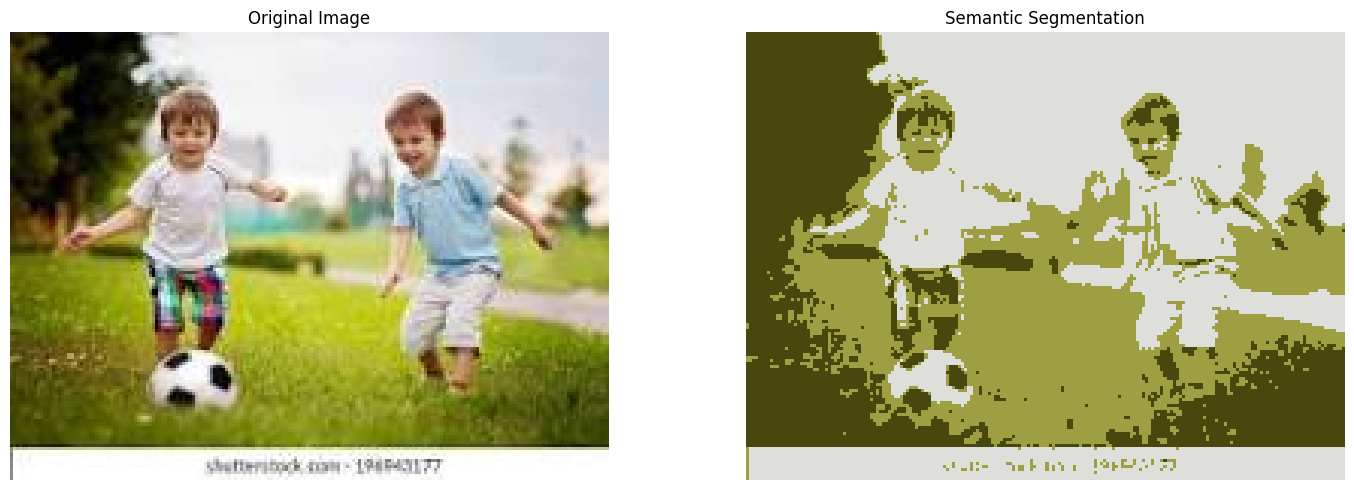

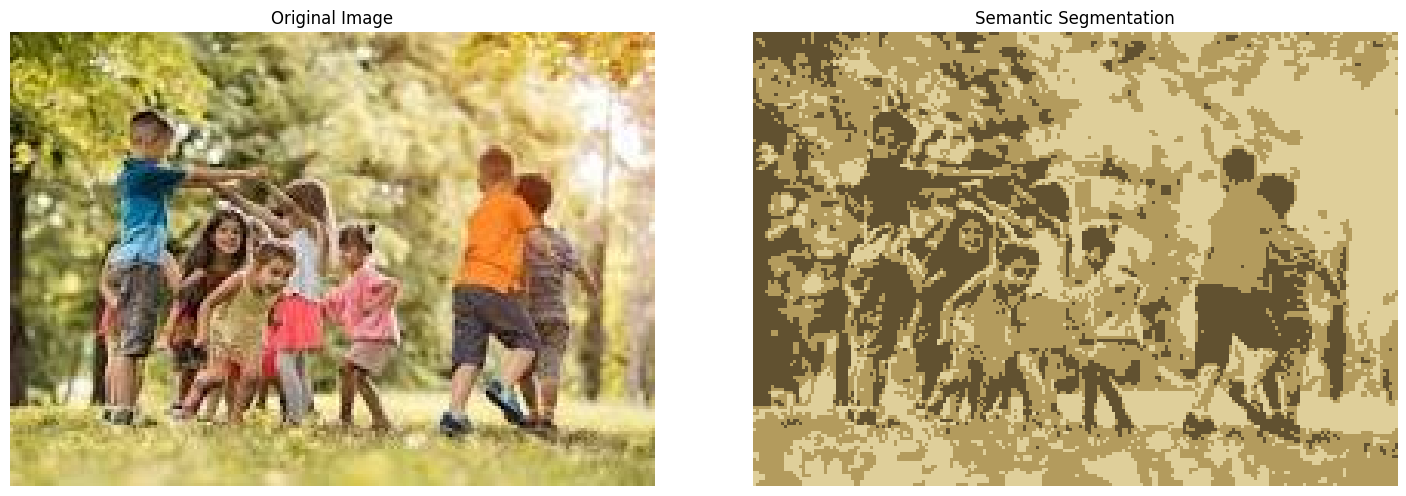

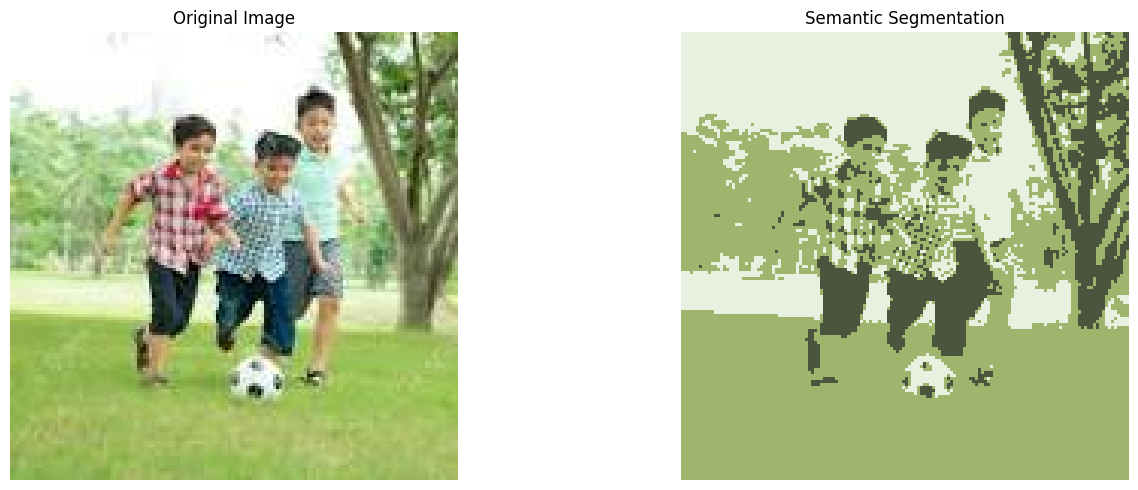

In [6]:
import cv2 as cv
import os
import glob
import numpy as np

def load_images(folder_path):
    """Load images from a folder."""
    image_files = glob.glob(os.path.join(folder_path, '*.jpeg'))
    images = [cv.imread(image_path) for image_path in image_files]
    return images

def semantic_segmentation(images, num_clusters=3):
    """Perform semantic segmentation using K-means clustering."""
    segmented_images = []
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    for img in images:
        pixels = img.reshape((-1, 3))
        pixels = np.float32(pixels)
        _, labels, centers = cv.kmeans(pixels, num_clusters, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
        centers = np.uint8(centers)
        segmented_img = centers[labels.flatten()].reshape(img.shape)
        segmented_images.append(segmented_img)
    return segmented_images

# Load images
folder_path = "/content/drive/MyDrive/Digital Image-Signal Processing/Lab-02"
images = load_images(folder_path)

# Perform segmentation
semantic_segmented_images = semantic_segmentation(images)

# Display results
for i in range(3):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(semantic_segmented_images[i], cv.COLOR_BGR2RGB))
    plt.title('Semantic Segmentation')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


# Lab-2 •	Given an image and a mask, determine the region, compute the area, then label the picture by overlapping the mask over the image.

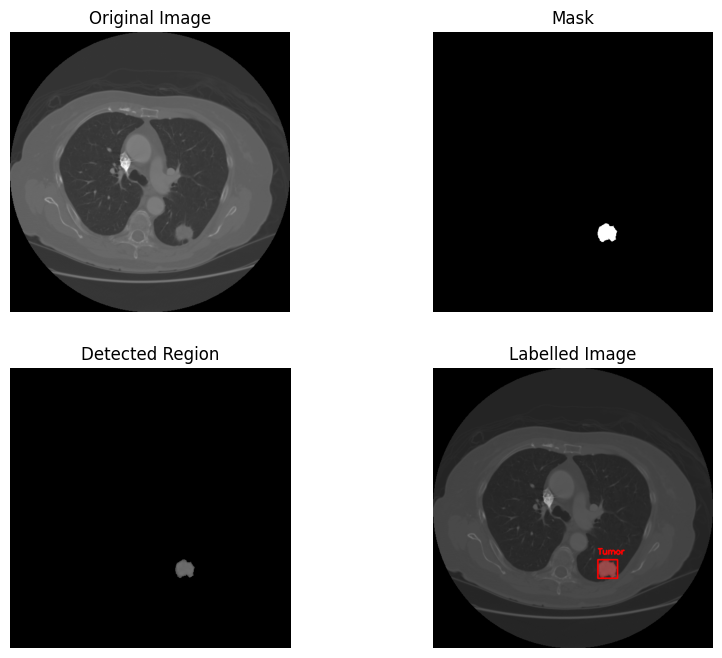

Area of the determined region: 890


In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image and mask
image = cv2.imread("/content/Image.png")
mask = cv2.imread("/content/Mask.png", cv2.IMREAD_GRAYSCALE)

# Determine the region using the mask
region = cv2.bitwise_and(image, image, mask=mask)

# Compute the area of the determined region
area = np.sum(mask != 0)

# Create a copy of the mask with red color
red_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
red_mask[mask != 0] = [0, 0, 255]  # Set non-zero mask pixels to red color (BGR format)

# Overlay the red mask onto the original image
labelled_image = cv2.addWeighted(image, 0.7, red_mask, 0.3, 0)

# Add a rectangle outside the determined region
x, y, w, h = cv2.boundingRect(mask)  # Get bounding box coordinates
cv2.rectangle(labelled_image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Draw rectangle

# Add label "tumor" to the rectangle
cv2.putText(labelled_image, 'Tumor', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the results
plt.figure(figsize=(10, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Mask
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis("off")

# Region
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
plt.title("Detected Region")
plt.axis("off")

# Labelled Image
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(labelled_image, cv2.COLOR_BGR2RGB))
plt.title("Labelled Image")
plt.axis("off")

plt.show()

# Output area
print("Area of the determined region:", area)


Lab-03


In [ ]:
import cv2 as cv
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

def load_images(folder_path):
    """Load images from a folder."""
    image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    images = [cv.imread(image_path) for image_path in image_files]
    return images

def basic_intensity_transform(images, alpha=1.0, beta=0):
    """Perform basic intensity transformation."""
    transformed_images = []
    for img in images:
        transformed_img = cv.convertScaleAbs(img, alpha=alpha, beta=beta)
        transformed_images.append(transformed_img)
    return transformed_images

def apply_filter(images, filter_type='high_pass'):
    """Apply convolution filter."""
    if filter_type == 'high_pass':
        kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    elif filter_type == 'low_pass':
        kernel = np.ones((3, 3), np.float32) / 9
    elif filter_type == 'laplacian':
        kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    else:
        raise ValueError("Invalid filter type. Choose 'high_pass', 'low_pass', or 'laplacian'.")

    filtered_images = []
    for img in images:
        filtered_img = cv.filter2D(img, -1, kernel)
        filtered_images.append(filtered_img)
    return filtered_images

def edge_detection(images, method='canny'):
    """Perform edge detection."""
    if method == 'canny':
        edge_images = [cv.Canny(img, 100, 200) for img in images]
    elif method == 'sobel':
        edge_images = [cv.Sobel(cv.cvtColor(img, cv.COLOR_BGR2GRAY), cv.CV_64F, 1, 1, ksize=5) for img in images]
    elif method == 'prewitt':
        kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
        kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
        edge_images = [cv.filter2D(cv.cvtColor(img, cv.COLOR_BGR2GRAY), -1, kernelx) + cv.filter2D(cv.cvtColor(img, cv.COLOR_BGR2GRAY), -1, kernely) for img in images]
    else:
        raise ValueError("Invalid edge detection method. Choose 'canny', 'sobel', or 'prewitt'.")
    return edge_images

# Load images
folder_path = "/content/drive/MyDrive/Digital Image-Signal Processing/Lab-01/Images 25"
images = load_images(folder_path)

# Basic Intensity Transform
transformed_images = basic_intensity_transform(images, alpha=1.5, beta=20)

# Convolution Filters
high_pass_images = apply_filter(images, filter_type='high_pass')
low_pass_images = apply_filter(images, filter_type='low_pass')
laplacian_images = apply_filter(images, filter_type='laplacian')

# Edge Detection
canny_edge_images = edge_detection(images, method='canny')
sobel_edge_images = edge_detection(images, method='sobel')
prewitt_edge_images = edge_detection(images, method='prewitt')


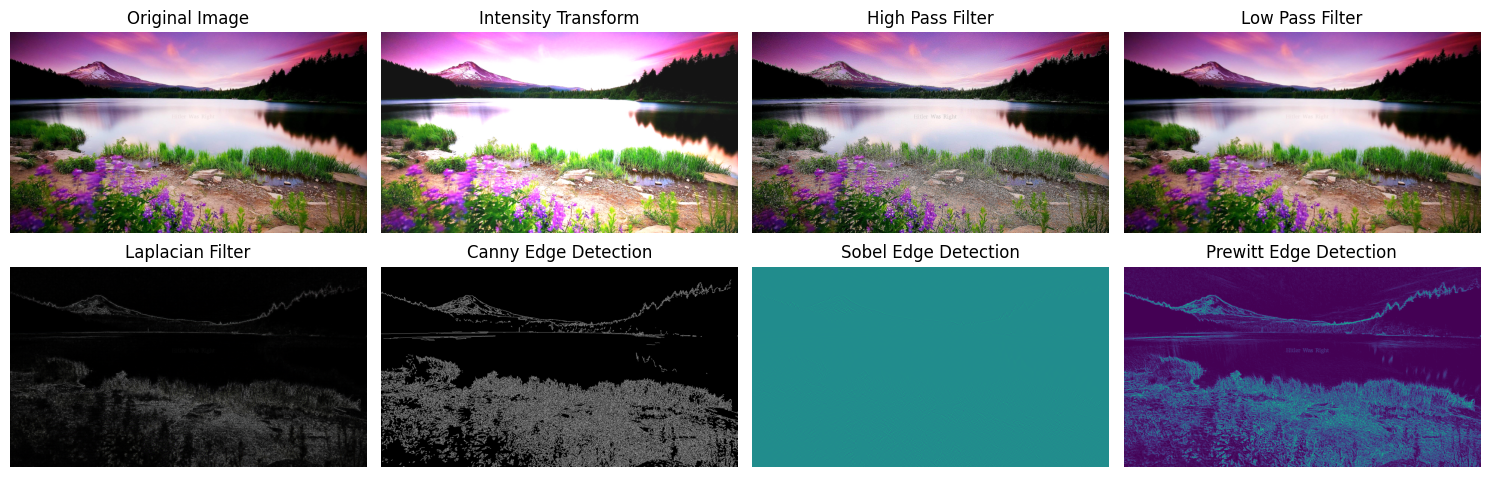

In [ ]:
def plot_images(images, titles):
    num_images = len(images)
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        if i < 6:
            images[i] = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

i = 1
first_images = [images[i], transformed_images[i], high_pass_images[i], low_pass_images[i], laplacian_images[i], canny_edge_images[i], sobel_edge_images[i], prewitt_edge_images[i]]
titles = ['Original Image', 'Intensity Transform', 'High Pass Filter', 'Low Pass Filter', 'Laplacian Filter', 'Canny Edge Detection', 'Sobel Edge Detection', 'Prewitt Edge Detection']

plot_images(first_images, titles)


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_images_from_folder(folder_path):
    images = []
    image_files = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            images.append(img)
            image_files.append(filename)
    return images, image_files

def save_image(image, output_folder, filename):
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, image)

def lowpass_filter(images, output_folder):
    lowpass_images = []
    for i, img in enumerate(images):
        lowPass = cv2.GaussianBlur(img, (3, 3), 0)
        save_image(lowPass, output_folder, f"lowpass_{i}.jpg")
        lowpass_images.append(lowPass)
    return lowpass_images

def highpass_filter(images, output_folder):
    highpass_images = []
    for i, img in enumerate(images):
        kernal = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        highPass = cv2.filter2D(img, -1, kernal)
        save_image(highPass, output_folder, f"highpass_{i}.jpg")
        highpass_images.append(highPass)
    return highpass_images

def gaussian_filter(images, output_folder):
    gaussian_images = []
    for i, img in enumerate(images):
        gaussian = cv2.GaussianBlur(img, (3, 3), 0)
        save_image(gaussian, output_folder, f"gaussian_{i}.jpg")
        gaussian_images.append(gaussian)
    return gaussian_images

def laplacian_filter(images, output_folder):
    laplacian_images = []
    for i, img in enumerate(images):
        laplacian = cv2.Laplacian(img, cv2.CV_64F)
        laplacian = np.uint8(np.absolute(laplacian))
        save_image(laplacian, output_folder, f"laplacian_{i}.jpg")
        laplacian_images.append(laplacian)
    return laplacian_images

def median_filter(images, output_folder):
    median_images = []
    for i, img in enumerate(images):
        median = cv2.medianBlur(img, 3)
        save_image(median, output_folder, f"median_{i}.jpg")
        median_images.append(median)
    return median_images

def plot_filtered_images(images, lowpass_images, highpass_images, gaussian_images, laplacian_images, median_images):
    fig, axes = plt.subplots(nrows=len(images), ncols=6, figsize=(24, 4*len(images)))
    for i in range(len(images)):
        axes[i, 0].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axes[i, 0].set_title('Original Image')
        axes[i, 0].axis('off')

        axes[i, 1].imshow(cv2.cvtColor(lowpass_images[i], cv2.COLOR_BGR2RGB))
        axes[i, 1].set_title('Lowpass Filtered Image')
        axes[i, 1].axis('off')

        axes[i, 2].imshow(cv2.cvtColor(highpass_images[i], cv2.COLOR_BGR2RGB))
        axes[i, 2].set_title('Highpass Filtered Image')
        axes[i, 2].axis('off')

        axes[i, 3].imshow(cv2.cvtColor(gaussian_images[i], cv2.COLOR_BGR2RGB))
        axes[i, 3].set_title('Gaussian Filtered Image')
        axes[i, 3].axis('off')

        axes[i, 4].imshow(laplacian_images[i], cmap='gray')
        axes[i, 4].set_title('Laplacian Filtered Image')
        axes[i, 4].axis('off')

        axes[i, 5].imshow(median_images[i], cmap='gray')
        axes[i, 5].set_title('Median Filtered Image')
        axes[i, 5].axis('off')

    plt.tight_layout()
    plt.show()

# Path to the folder containing images
folder_path = r"D:\Books\6th Semester\image lab\Image Lab\image 4"

# Output folders for filtered images
output_folder_lowpass = "output/lowpass_images"
output_folder_highpass = "output/highpass_images"
output_folder_gaussian = "output/gaussian_images"
output_folder_laplacian = "output/laplacian_images"
output_folder_median = "output/median_images"

# Read images from the folder
images, image_files = read_images_from_folder(folder_path)